## Gender & HDI Project


## 1.Introduction
The Human Development Index(HDI) is a summary of measures of average achievement in key dimensions of human development, notably: health, education, and standard of living. Gender Development Index(GDI) is the ratio of female to male HDI values. This indicator is used to measure the gender gap in human development. The Sustainable Development Goal(SDG) has prioritized gender equality and empowerment of women in its goal five. Similarly, it has also focused on inclusive and equitable quality education with lifelong learning opportunities for all. So, considering the importance of gender and educational attainment, I have attempted to compare the years of schooling of the female with the HDI according to their ranking status. Additionally, the research has attempted to find the differences in the male's and female's HDI.


## 2. Hypothesis
Based on the literature and data, I have the following broad research questions:

1. Is there any relation between HDI and years of schooling of females.
2. Are there any differences between the HDI of males and the HDI of females.

I have formulated the following hypothesis for this statistical analysis based on the broad research question:

1.Hypothesis for my first research question

**H₀:** There is no significant difference in the mean years of education of females in any of the HDI groups.

**Hₐ:** There is a significant difference in the mean years of education of females in at least one group compared to other. 

2.Hypothesis for my second research question

**H₀:** There is no significant difference between the average HDI of males and females.

**Hₐ:** There is a significant difference between the average HDI of males and females.


## 3. Data
For this research I have collected data from [UNdata](http://data.un.org/DocumentData.aspx?id=417) and contains the HDI value, years of schooling indicators, percapita income and other additional information of 166 countries for the year 2018. My major interest is with HDI, HDI of male and female, and mean years of educational attainment by female. The data have 166 rows and 15 columns. Each row provide information of each country's HDI, GDI, years of schooling and percapita income with respect to male and female.The column HDI_rank has four subgroups according to the HDI rank of the respective countries, HDI_rank: VH(very high), H(High), M(medium), L(low).

In [ ]:
# set up environment 
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#improve the figure quality
plt.rcParams['figure.dpi'] = 120
plt.rcParams['savefig.dpi'] = 120

In [ ]:
df = pd.read_csv(r'E:\Bootcamp\Thinkful\Thinkful Modules\14 Capstone 1 Experimental Design\Capstone1_Related\Gender development index_ver2.csv')

Column information:
HDI_rank: VH(very high), H(High), M(medium), L(low)
GDI_Group: Ranking according to difference between HDI of male and HDI of female


In [ ]:
df.head()

,HDI rank,Country,HDI_rank,GDI_18,GDI_Group,HDI_Female,HDI_Male,LE_Female,LE_Male,exp_yrs_scho_F,exp_yrs_scho_M,mean_yrs_scho_F,mean_yrs_scho_M,GNI_F,GNI_M
0,1,Norway,VH,0.990,1,0.946,0.955,84.3,80.3,18.8,17.4,12.6,12.5,60283,75688
1,2,Switzerland,VH,0.963,2,0.924,0.959,85.5,81.7,16.1,16.3,12.7,13.6,49275,69649
2,3,Ireland,VH,0.975,2,0.929,0.953,83.7,80.4,18.9,18.7,12.7,12.3,44921,66583
3,4,Germany,VH,0.968,2,0.923,0.953,83.6,78.8,17.0,17.2,13.7,14.6,38470,55649
4,4,"Hong Kong, China (SAR)",VH,0.963,2,0.919,0.954,87.6,81.8,16.4,16.6,11.6,12.5,43852,79385


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HDI rank         166 non-null    int64  
 1   Country          166 non-null    object 
 2   HDI_rank         166 non-null    object 
 3   GDI_18           166 non-null    float64
 4   GDI_Group        166 non-null    int64  
 5   HDI_Female       166 non-null    float64
 6   HDI_Male         166 non-null    float64
 7   LE_Female        166 non-null    float64
 8   LE_Male          166 non-null    float64
 9   exp_yrs_scho_F   166 non-null    float64
 10  exp_yrs_scho_M   166 non-null    float64
 11  mean_yrs_scho_F  166 non-null    float64
 12  mean_yrs_scho_M  166 non-null    float64
 13  GNI_F            166 non-null    int64  
 14  GNI_M            166 non-null    int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 19.6+ KB


## 4. Methods
The main features included in the data analysis are: HDI rank, HDI of male and female, and years of schooling of females. As I am going to answer two broad questions, I will first implement the test to find the significance of HDI ranking status over years of schooling for females. Secondly, I will check the independent sample t-test to answer the mean difference between HDI of male and female if the distribution of data permits for the parametric test.

Text(0.5, 1.0, 'Histogram of Gender Development Index of 2018')

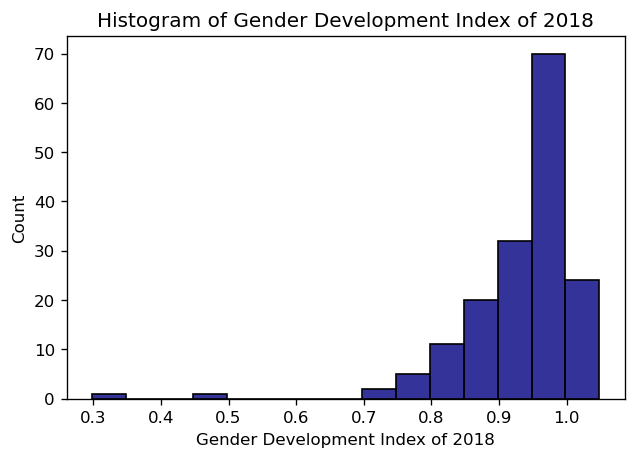

In [ ]:
#histogram of GDI 2018
fig = sns.histplot(data=df, x='GDI_18', color = 'navy',alpha = 0.8, binwidth = .05)
plt.xlabel('Gender Development Index of 2018')
plt.title('Histogram of Gender Development Index of 2018')

Text(0, 0.5, 'GDI of 2018')

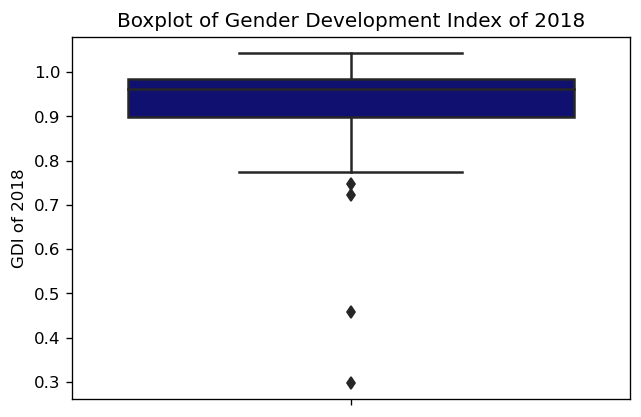

In [ ]:
# box plot of GDI 18
fig = sns.boxplot(data=df, y='GDI_18', color = 'navy')

plt.title('Boxplot of Gender Development Index of 2018')
plt.ylabel('GDI of 2018')

In [ ]:
#Checking for quantile range
print(df['GDI_18'].quantile(0.05))
print(df['GDI_18'].quantile(0.95))

0.7967500000000001
1.013


In [ ]:
#removing outliars from GDI 18 # removed through visual inspection
df_new = df[(df['GDI_18']> 0.774)]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 164
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HDI rank         161 non-null    int64  
 1   Country          161 non-null    object 
 2   HDI_rank         161 non-null    object 
 3   GDI_18           161 non-null    float64
 4   GDI_Group        161 non-null    int64  
 5   HDI_Female       161 non-null    float64
 6   HDI_Male         161 non-null    float64
 7   LE_Female        161 non-null    float64
 8   LE_Male          161 non-null    float64
 9   exp_yrs_scho_F   161 non-null    float64
 10  exp_yrs_scho_M   161 non-null    float64
 11  mean_yrs_scho_F  161 non-null    float64
 12  mean_yrs_scho_M  161 non-null    float64
 13  GNI_F            161 non-null    int64  
 14  GNI_M            161 non-null    int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 20.1+ KB


Text(0, 0.5, 'GDI of 2018')

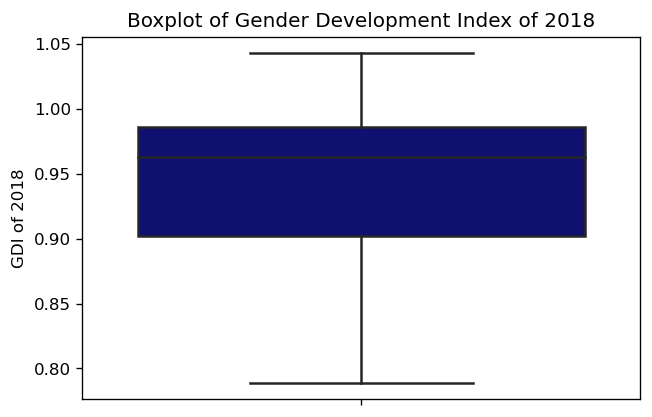

In [ ]:
# plotting after outliar removal
fig = sns.boxplot(data=df_new, y='GDI_18', color = 'navy')

plt.title('Boxplot of Gender Development Index of 2018')
plt.ylabel('GDI of 2018')

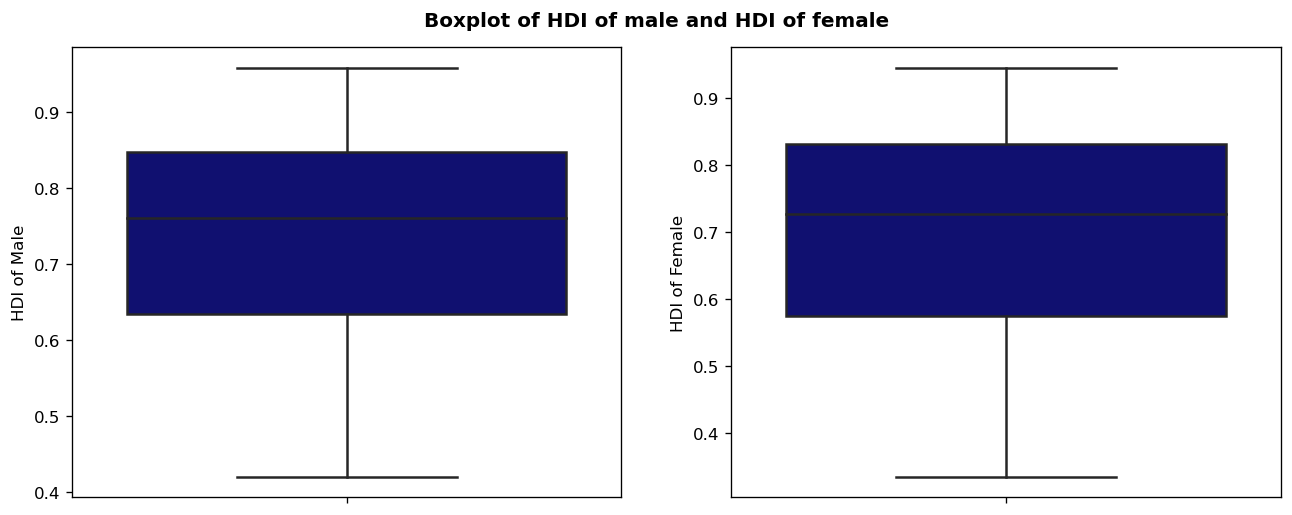

In [ ]:
# boxplot of Male and Female HDI
fig = plt.figure(figsize = (13,10))

plt.subplot(2,2,1)
sns.boxplot(data=df_new, y='HDI_Male', color = 'orange')
plt.ylabel('HDI of Male')

plt.subplot(2,2,2)
sns.boxplot(data=df_new, y='HDI_Female', color = 'navy')
plt.ylabel('HDI of Female')

# Title for the complete figure
fig.suptitle('Boxplot of HDI of male and HDI of female' ,
               fontsize = 'large' , 
               fontweight = 'bold' )
  
# Adjust subplots so that titles don't overlap
fig.subplots_adjust(top = 0.95)

In [ ]:
# Checking for normality

print('#HDI of male')
print(stats.describe(df_new['HDI_Male']))
print()
print('#HDI of female')
print(stats.describe(df_new['HDI_Female']))
print()
print('#yrs female')
print(stats.describe(df_new['mean_yrs_scho_F']))
print()
print('#yrs male')
print(stats.describe(df_new['mean_yrs_scho_M']))

#HDI of male
DescribeResult(nobs=161, minmax=(0.42, 0.959), mean=0.7401180124223602, variance=0.019895604736024843, skewness=-0.36020695612874387, kurtosis=-0.7884826191018943)

#HDI of female
DescribeResult(nobs=161, minmax=(0.335, 0.946), mean=0.703583850931677, variance=0.025015456987577643, skewness=-0.3932270958096009, kurtosis=-0.9001855605815599)

#yrs female
DescribeResult(nobs=161, minmax=(1.0, 13.7), mean=8.521118012422361, variance=11.093426242236024, skewness=-0.4202276354555226, kurtosis=-0.9311856079253418)

#yrs male
DescribeResult(nobs=161, minmax=(2.1, 14.6), mean=9.134782608695653, variance=7.748532608695652, skewness=-0.27503408387842737, kurtosis=-0.8867535188048876)


In [ ]:
# creating separate HDI group variables
VH_group = df_new.loc[df_new['HDI_rank']=='VH', ['mean_yrs_scho_F']]
H_group = df_new.loc[df_new['HDI_rank']=='H', ['mean_yrs_scho_F']]
M_group = df_new.loc[df_new['HDI_rank']=='M', ['mean_yrs_scho_F']]
L_group = df_new.loc[df_new['HDI_rank']=='L', ['mean_yrs_scho_F']]

In [ ]:
#counting the first one
print(len(VH_group))

57


In [ ]:
#checking the normality of grouped variables
print(stats.describe(VH_group))
print(stats.describe(H_group))
print(stats.describe(M_group))
print(stats.describe(L_group))

DescribeResult(nobs=57, minmax=(array([6.9]), array([13.7])), mean=array([11.50701754]), variance=array([2.16066416]), skewness=array([-0.92312746]), kurtosis=array([0.5196274]))
DescribeResult(nobs=46, minmax=(array([6.4]), array([12.8])), mean=array([9.35217391]), variance=array([2.3003285]), skewness=array([0.11508744]), kurtosis=array([-0.67067144]))
DescribeResult(nobs=30, minmax=(array([2.1]), array([11.])), mean=array([6.14]), variance=array([3.8342069]), skewness=array([0.4659151]), kurtosis=array([0.25966791]))
DescribeResult(nobs=28, minmax=(array([1.]), array([7.])), mean=array([3.62857143]), variance=array([2.18359788]), skewness=array([0.31125112]), kurtosis=array([-0.29678233]))


Text(0, 0.5, 'Mean years of schooling of female')

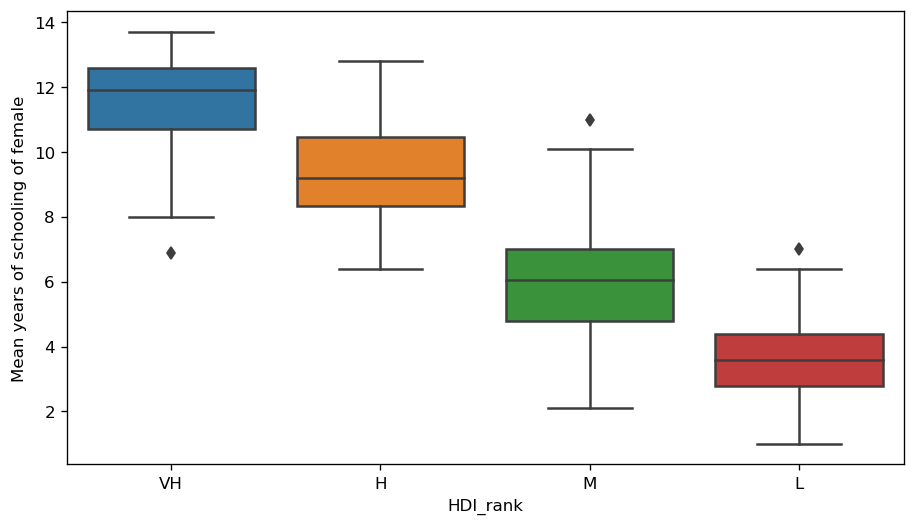

In [ ]:
#box plot of the grouped variables
fig = plt.figure(figsize = (9,5))
sns.boxplot(data=df_new, y ='mean_yrs_scho_F',x = 'HDI_rank')
plt.ylabel('Mean years of schooling of female')

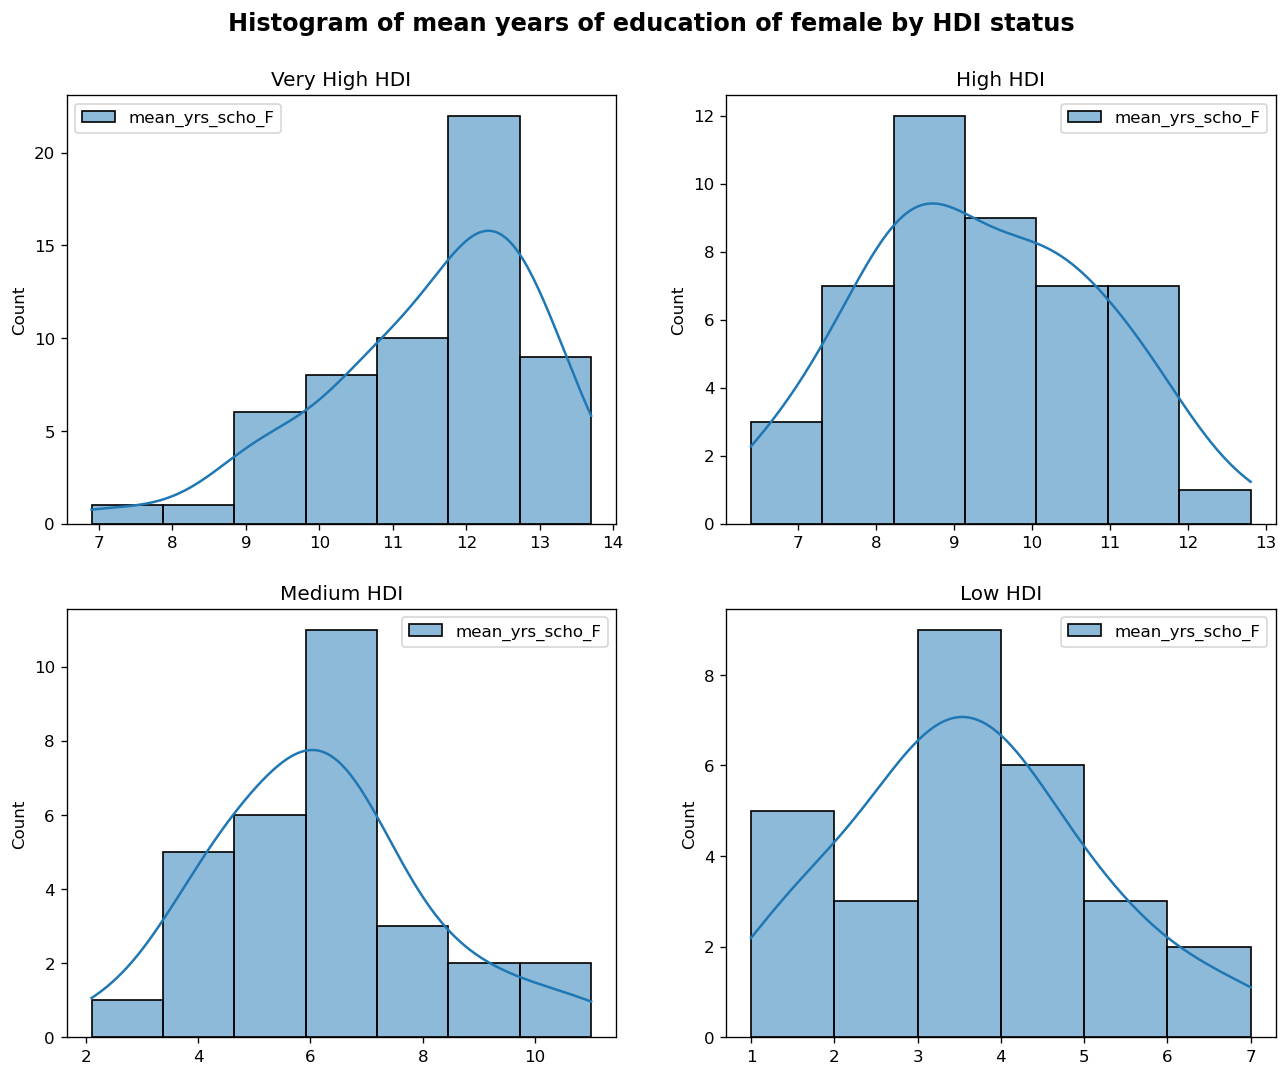

In [ ]:
#histogram of the grouped variables HDI rank
fig = plt.figure(figsize = (13,10))

plt.subplot(2,2,1)
sns.histplot(VH_group, kde= True).set(title= 'Very High HDI')

plt.subplot(2,2,2)
sns.histplot(H_group,kde= True).set(title= 'High HDI')

plt.subplot(2,2,3)
sns.histplot(M_group, kde=True).set(title= 'Medium HDI')

plt.subplot(2,2,4)
sns.histplot(L_group, kde = True).set(title= 'Low HDI')

# Title for the complete figure
fig.suptitle('Histogram of mean years of education of female by HDI status' ,
               fontsize = 'x-large' , 
               fontweight = 'bold' )
  
# Adjust subplots so that titles don't overlap
fig.subplots_adjust(top = 0.91)

In [ ]:
# statistical test for normality
stats.shapiro(df_new['mean_yrs_scho_F'])

ShapiroResult(statistic=0.9474573731422424, pvalue=9.708453944767825e-06)

In [ ]:
#mean years of schooling of female one way anova
stats.f_oneway(
    df_new.loc[df_new['HDI_rank']=='VH', ['mean_yrs_scho_F']],
    df_new.loc[df_new['HDI_rank']=='H', ['mean_yrs_scho_F']],
    df_new.loc[df_new['HDI_rank']=='M', ['mean_yrs_scho_F']],
    df_new.loc[df_new['HDI_rank']=='L', ['mean_yrs_scho_F']]
)

F_onewayResult(statistic=array([187.92048224]), pvalue=array([6.78016396e-52]))

In [ ]:
#tukey test for further accessing mean difference between groups
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(
    endog = df_new['mean_yrs_scho_F'],
    groups = df_new['HDI_rank'],
    alpha = 0.05)

In [ ]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
H,L,-5.8039,0.001,-6.7834,-4.8243,True
H,M,-3.2122,0.001,-4.1817,-2.2427,True
H,VH,2.1548,0.001,1.336,2.9736,True
L,M,2.5917,0.001,1.5159,3.6675,True
L,VH,7.9587,0.001,7.0164,8.901,True
M,VH,5.367,0.001,4.4352,6.2988,True


In [ ]:
#t-test of HDI of Male vs Female
stats.ttest_ind(df_new['HDI_Male'], df_new['HDI_Female'])

Ttest_indResult(statistic=2.1874363313346903, pvalue=0.029433964086246774)

In [ ]:
# Confidence interval

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(df_new['HDI_Female'],df_new['HDI_Male']))

The difference in means at the 95% confidence interval (two-tail) is between 0.0037986000043990567 and 0.06926972297696785.


## 5. Results
The descriptive result and visual inspection allowed for parametric test for both one way ANOVA and t-test. To find out if there is any association between HDI group and female's years of education I have used one way ANOVA. The one way ANOVA which has been used to test between the group of female's years of education showed significant result.That means there is at least one HDI rank group which is significantly different than other group considering the educational attainment by a female. Similarly,the t-test conducted to see whether there is any significant difference in the mean of male's and female's HDI also showed significant result at 95 % CI.

## 6. Discussion and recommendation
The GDI, as well as HDI, are significantly higher in developed countries than in developing or underdeveloped countries. While government and developmental institutions are continuing to roll their efforts towards achieving the SDG target, many countries are still falling behind the minimization of gender discrepancies in educational attainment. This research has clearly shown that high HDI is positively associated with the mean years of schooling of females. The result showed that there are almost eight years of difference in schooling between low HDI countries and very high HDI countries.

Similarly, considering the HDI of males and females to check if there exists any inequality in gender development, the two-tailed t-test showed the difference in mean HDI value between 0.003. to 0.07 at 95% CI. So, the result showed the disparity in human development according to gender status. Hence, considering the statistical inspection over HDI and educational attainment by females, it is pivotal to implement policies that help to reduce the gender difference. Therefore, it is prime important to take into consideration of gender gap while developing and implementing projects and programs which directly and indirectly help to attain SDG.

This research has highlighted interesting insights concerning gender and educational attainment for the year 2018. For further detailed analysis, we can dive into newly updated data of the latest year available and see how the program and policies are doing with the SMART criteria of SDG. We can focus on the 'Measure' criteria and test if there have been significant changes over time concerning gender development and education sectors. Similarly, we can dive even further to get perspective on how are different countries progressing towards the SDG achievement.

